# Project mnist hard writing

data souce : Kaggle
Link : https://www.kaggle.com/c/digit-recognizer

2023/01/20
2238i

lets get init

In [120]:
##Hardwere
import torch
if torch.cuda.is_available() == True:
  device = 'cuda'
  templist = [1,2,3]
  templist = torch.FloatTensor(templist).to(device)
  print("Cude torch working : ",end="")
  print(templist.is_cuda)
  print("current device no. : ",end="")
  print(torch.cuda.current_device())
  print("GPU device count : ",end="")
  print(torch.cuda.device_count())
  print("GPU name : ",end="")
  print(torch.cuda.get_device_name(0))
  print("device : ",device)
else:
  print("cant use gpu , activating cpu")
  device = 'cpu'

Cude torch working : True
current device no. : 0
GPU device count : 1
GPU name : NVIDIA GeForce GTX 1080
device :  cuda


In [121]:
import csv
import numpy as np
import torch


f =  open("C:/Users/OWO/Documents/AA_CODE/@Projects/Projects/ai_0005_lc_hardwriting/train.csv")
read = csv.reader(f)

#data to list
data = []
for row in read:
  data.append(row)

#delete legend data
del data[0]

#get num data
data = np.float_(data)
data = np.array(data)
y_train_numbers_origianl = data[:,0:1]
y_train_numbers  = [[0 for col in range(10)] for row in range(len(y_train_numbers_origianl))]
#print(y_train_numbers)
for row in range(len(y_train_numbers_origianl)):
  y_train_numbers[row][int(y_train_numbers_origianl[row][0])] = 1
#print((y_train_numbers))

#get pixel data
x_train_data = data[:,1:]
#print(x_train_data)

f.close()

##TENSOR
x_train_data = torch.Tensor(x_train_data).to(device)
y_train_numbers = torch.Tensor(y_train_numbers).to(device)
print(x_train_data.type())
print(x_train_data.size())
print(y_train_numbers.size())

torch.cuda.FloatTensor
torch.Size([42000, 784])
torch.Size([42000, 10])


## ML

In [122]:
import torch



#lr_list = [1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
lr_list = [1e-4]
nb_epoch = 10000



for LR in lr_list:
  
  W = torch.zeros( [784,10] , requires_grad=True,device=device)
  b = torch.zeros( 10 , requires_grad=True,device=device)
  optimizer = torch.optim.SGD([W,b],lr=LR)
  loss = torch.nn.BCELoss()
  for epoch in range(nb_epoch+1):
    
    hypothesis = torch.nn.functional.softmax(torch.matmul(x_train_data,W) + b,dim=1)
    cost = loss(hypothesis,y_train_numbers)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
  print("LR : %.E cost : %.5f"%(LR,cost.item()))



LR : 1E-04 cost : 0.03696


#  Learning rate
LR : 1E+00 cost : 18.02737
LR : 1E-01 cost : 18.06524
LR : 1E-02 cost : 18.06333
LR : 1E-03 cost : 17.90429
### LR : 1E-04 cost : 0.04401
LR : 1E-05 cost : 0.05749
LR : 1E-06 cost : 0.10377
LR : 1E-07 cost : 0.25261
LR : 1E-08 cost : 0.31652

### Accuray : 94

In [123]:
#Test
hypothesis_num = torch.argmax(hypothesis,dim=1) #argmax returns the INDEX #dim = 0 means max in column // dim = 1 means max in row
accurcay = hypothesis_num.unsqueeze(1).tolist() == y_train_numbers_origianl
acc_in_percent = accurcay.sum().item()/len(y_train_numbers_origianl)*100
print(accurcay)
print(acc_in_percent)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
94.17142857142858


## Show Wrong Images

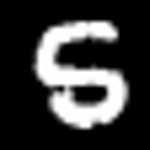

Row num : 19 // Num : 5 Hypothesis : 6


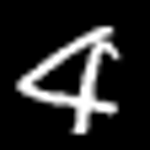

Row num : 43 // Num : 4 Hypothesis : 9


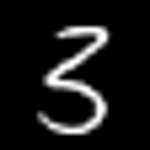

Row num : 46 // Num : 3 Hypothesis : 5


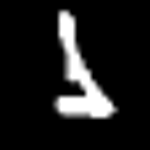

Row num : 60 // Num : 1 Hypothesis : 6


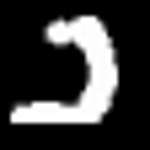

Row num : 73 // Num : 2 Hypothesis : 3


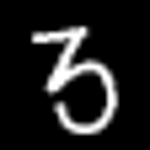

Row num : 90 // Num : 3 Hypothesis : 5


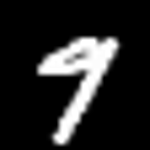

Row num : 95 // Num : 9 Hypothesis : 7


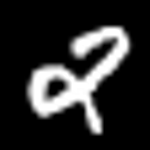

Row num : 104 // Num : 2 Hypothesis : 4


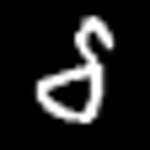

Row num : 125 // Num : 5 Hypothesis : 3


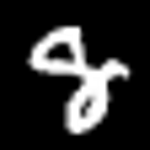

Row num : 131 // Num : 8 Hypothesis : 9


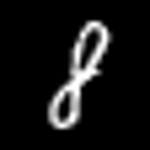

Row num : 135 // Num : 8 Hypothesis : 1


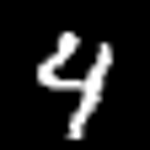

Row num : 163 // Num : 4 Hypothesis : 9


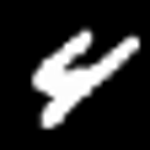

Row num : 170 // Num : 4 Hypothesis : 8


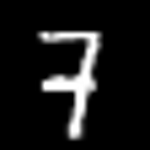

Row num : 173 // Num : 7 Hypothesis : 9


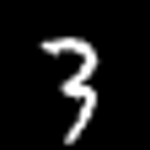

Row num : 192 // Num : 3 Hypothesis : 7


In [124]:
import PIL.Image
import IPython.display
import numpy as np

#make temp img list
imglist = [[0 for col in range(28)] for row in range(28)]

for num_row in range(len(x_train_data)):
  if num_row > 200: #Limit the output images. there are too many 
    break
  if accurcay[num_row][0] == False: #show me the wrong guesses I have to see for my self
    cnt = 0
    for row in range(28):
      for col in range(28):
        imglist[row][col] = x_train_data[num_row][cnt].item()
        cnt = cnt + 1
    img = PIL.Image.fromarray(np.uint8(imglist))#make array to size
    img  = img.resize([150,150])#set the size
    display(img)
    print("Row num : %d // Num : %.0f Hypothesis : %.0f"%(num_row,y_train_numbers_origianl[num_row][0],hypothesis_num[num_row]))


# END

Well I thought this would take a long time, but it only took 1 hour and 30 minutes.

Some of the wrong guessed numbers were due to bad handwriting, but most of them were difficult to read due to factors such as tilting or being too bold. 
 
Anyhow, it was fun and amazing to see the images(it was hard to display image). I feel like a real AI developer